<a href="https://colab.research.google.com/github/rahmanziaur/TestGraphTheory/blob/main/1_Pagerank_and_RiskScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_risk = pd.read_csv('risk-score.csv')
df_pr = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/1_Deg_PR_ECV_All.csv')

packages_risk = df_risk[['Package','FinalRiskScore']]
packages_pr = df_pr[['Label','Pageranks']]
#df_risk

search_string =['requests','numpy','six','setuptools','click']

for str in search_string:
  # pr_search = packages_pr[packages_pr['Label'] ==str]
  # risk_search =df_risk[df_risk['Package']==str]
  pr_search = packages_pr[packages_pr['Label'].str.startswith(str)]
  risk_search =df_risk[df_risk['Package'].str.startswith(str)]
  print(pr_search)
  print(risk_search)
#packages_risk.filter(regex=r'^f\.', axis=1)
#print(customer_name.startswith("J"))


                                      Label  Pageranks
31                          requests-2.28.2   0.025964
190                requests-toolbelt-0.10.1   0.001247
204                         requests-2.27.1   0.000750
293                 requests-oauthlib-1.3.1   0.000627
295                         requests-2.25.1   0.000537
326                         requests-2.26.0   0.000316
502               requests-unixsocket-0.3.0   0.000092
777                  requests-futures-1.0.0   0.000134
894                          requests-2.4.3   0.000125
902                         requests-2.19.1   0.000065
945                         requests-2.18.4   0.000179
1039                   requests-html-0.10.0   0.000093
1402                         requests-2.2.1   0.000079
1502                        requests-2.11.1   0.000126
1533                    requests-file-1.5.1   0.000093
1638                   requests-cache-1.0.1   0.000143
1800                        requests-2.22.0   0.000142
2039      

In [ ]:
import pandas as pd
import numpy as np

#df_risk = pd.read_csv('risk-score.csv')
df_pr = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/1_Deg_PR_ECV_All.csv')


packages_pr = df_pr['Label']

df_new=[]
new_list=[]

for fullname in packages_pr:
  splitting = fullname.split('-')
  first_name = splitting[0]
  new_list.append(first_name)

df_new = pd.DataFrame({'Package': pd.Series(new_list, index=df_pr['Pageranks'])})

df_risk = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/rahman/master/risk-score.csv')
packages_risk = df_risk[['Package','FinalRiskScore']]

final_list =[]
id =0;

#packages_risk['Pagerank'] = np.where(df_new['Package'] == packages_risk['Package'], df_new['Pageranks'], np.nan)

#print(df_new.loc['Package'][1])

df = pd.concat([df_new, df_risk], axis=0, ignore_index=True)
df.to_csv('zia.csv', index=False)

# for id in range(0, len(df_new['Package'])):
#   if (df_risk['Package'].values[id] == df_new['Package'].values[id]):
#     #print(df_new['Package'].values[id])
#     print(id)

# for id in range(0, len(df_new['Package'])):
#   for pack in df_risk['Package']:
#     pr_search = df_new['Packages'].str.startswith(pack)
#     print(pr_search)
    # if(df_new['Package'].values[id].str.contains(pack)):
    #   print(df_new['Package'].values[id])

# for pack in df_risk['Package']:
#   if(pack == df_new['Package'].values[id]):
#     print(pack)
#     id = id+1
#     final_list.append(pack)
#     id = id+1
#     data = {'Package': pd.Series(pack, index=id)}
# print(packages_risk)

In [ ]:
import pandas as pd
import re

df_risk = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/rahman/master/risk-score.csv')
df_pr = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/1_Deg_PR_ECV_All.csv')

df_pr["Score"] = ""

for i, row in df_pr.iterrows():
#Extract only the package name
  st = row['Label']
word1 = " ".join(re.findall("[a-zA-Z-]+", st))
if word1[-1]=="-":
  word1 = word1[:-1]
# search for package name in score csv and find the score
for i, row in df_risk.iterrows():
  if row['Package'] == word1:
    score = row['FinalRiskScore']
    break
# insert the score in df_pr in new column named as "Score"
df_pr.at[i,'Score'] = score

#print the final dataframe with score
for i, row in df_pr.iterrows():
  print(row)

#save csv file
df_pr.to_csv('final.csv')

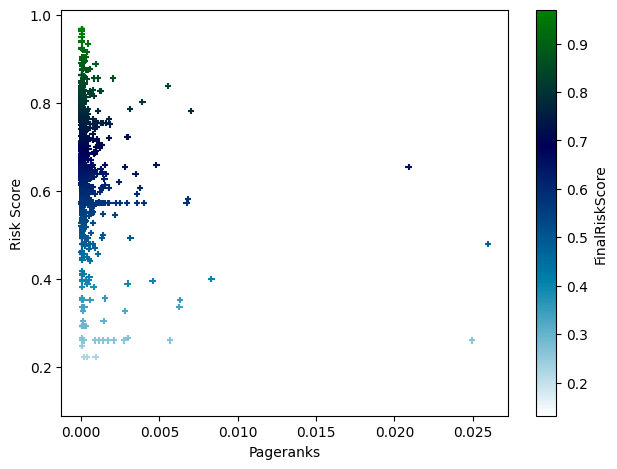

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/Preprocessed-2.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/pr-risk-small.csv')

# plt.plot(x,pdf , color = 'red')

#fig, ax = plt.subplots(nrows=1, ncols=1)
#figure(num=None, figsize=(12, 6), dpi=400, facecolor='w', edgecolor='b')

ax = df.plot.scatter(x='Pageranks', y='FinalRiskScore', c='FinalRiskScore', marker='+', cmap='ocean_r')

plt.xlabel('Pageranks')
plt.ylabel('Risk Score')

plt.tight_layout()
plt.savefig('score-vs-pr.png', edgecolor='black', dpi=2400, transparent=False)
plt.show()

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D

#df = pd.read_csv("https://raw.githubusercontent.com/softhints/dataplotplus/master/data/happyscore_income.csv")
#df = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/Preprocessed-3%20-%20sorted%20PR_cat.csv')
df = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/TestGraphTheory/main/Preprocessed-3%20-%20sorted%20PR_cat1.csv')

risk = df.FinalRiskScore

risk_min = min(risk)
risk_max = max(risk)

norm_risk = (risk - risk_min)/(risk_max - risk_min)
#df['norm_ineq'] = norm_ineq


figure(num=None, figsize=(15, 10), dpi=600, facecolor='w', edgecolor='b')

plt.xlabel('Pageranks')
plt.ylabel('Risk Score')

cateory = df.Category.unique()
#print(region[0])
df.Category = df.Category.replace('\'','')
#print(region[0])

Category_colors = {'H':'red', 'M':'purple', 'L':'green'}

#print(region_colors['Central and Eastern Europe'])

for i,j in df.iterrows():
    cat_color = Category_colors.get(j.Category.replace('\'',''), 'green')
    plt.scatter(df.Pageranks[i], df.FinalRiskScore[i], s=df.Pageranks[i] * 30000, alpha = 0.5, color=cat_color)


custom = [ Line2D([], [], marker='.', color=i, linestyle='None', markersize=20) for i in Category_colors.values()]

plt.legend(custom, Category_colors.keys(), fontsize=10)

HLINES = [.5, .75]
GREY50 = "#7F7F7F"

# BG_WHITE = "#fbf9f4"
# GREY_LIGHT = "#b4aea9"
# GREY50 = "#7F7F7F"
# GREY30 = "#4d4d4d"
# BLUE_DARK = "#1B2838"
# BLUE = "#2a475e"
# COLORS = ["#386cb0", "#fdb462", "#7fc97f" ]

[plt.text(x=row['Pageranks'], y=row['FinalRiskScore'], s=row['Label'].split('-')[0], fontsize=10) for k,row in df.iterrows() if 'D' in row.PR_Category]

for h in HLINES:
    plt.axhline(h, color=GREY50, ls=(0, (3, 3)), alpha=0.25, zorder=0)
#[plt.text(x=row['Pageranks'], y=row['FinalRiskScore'], s=row['Label']) for pr in df['Pageranks'] if pr >= 0.005]
#[plt.text(x=row['Pageranks'], y=row['FinalRiskScore'])]
plt.tight_layout()
plt.savefig('risk-vs-pagerank-3k.png')
plt.show()
